# https://blog.csdn.net/u010159842/article/details/70738854
https://code.csdn.net/Kevin_QQ/cartopy_trial/tree/master
https://blog.csdn.net/kevin_qq/article/details/51454239
http://bbs.06climate.com/forum.php?mod=viewthread&ordertype=2&tid=58970

# 绘制全球地图

In [ ]:
scale='110m'
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
fig=plt.figure(figsize=(8, 10))
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
#===================================================
#需要填充陆地颜色时使用
#ax.add_feature(cfeature.LAND, facecolor='0.75') #默认为110m，其它分辨率需用下面命令
land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',
                                                              facecolor=cfeature.COLORS['land'])
ax.add_feature(land, facecolor='0.75')
#===================================================
#改变ax.add_feature和ax.coastlines的先后使用顺序可实现边界线的显示或完全填充覆盖
ax.coastlines(scale)
#===================================================
#标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
#添加网格线
gl = ax.gridlines()

# 绘制全球地图（函数形式）

In [ ]:
#===================================================
#函数形式，调用cartopy，绘制全球地图
#===================================================
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def make_map(scale):
    fig=plt.figure(figsize=(8, 10))
    ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_global()
    land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',
                                                              facecolor=cfeature.COLORS['land'])
    ax.add_feature(land, facecolor='0.75')
    ax.coastlines(scale)
    #标注坐标轴
    ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    #zero_direction_label用来设置经度的0度加不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    #添加网格线
    #gl = ax.gridlines()
    ax.grid()
    return fig,ax
fig,ax=make_map(scale='110m')

# 绘制区域地图（函数形式）

In [ ]:
#===================================================
#函数形式，调用cartopy，绘制区域地图
#===================================================
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def make_map(scale,box,xstep,ystep):
    fig=plt.figure(figsize=(20, 20))
    ax=plt.axes(projection=ccrs.PlateCarree())
    #set_extent需要配置相应的crs，否则出来的地图范围不准确
    ax.set_extent(box,crs=ccrs.PlateCarree())
    land = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', scale,facecolor = 'red', edgecolor = 'black')#[0.9375, 0.9375, 0.859375],edgecolor='face',facecolor=cfeature.COLORS['land'])
    ax.add_feature(land, facecolor='0.75')
    ax.coastlines(scale)
    #===================================================
    #图像地址D:\Program Files\WinPython-32bit-2.7.9.3\python-2.7.9\Lib\site-packages\
    #cartopy\data\raster\natural_earth\50-natural-earth-1-downsampled.png
    #如果有其它高精度图像文件，改名替换即可
    ax.stock_img()
    #===================================================
    #标注坐标轴
    ax.set_xticks(np.arange(box[0],box[1]+xstep,xstep), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2],box[3]+ystep,ystep), crs=ccrs.PlateCarree())
    #zero_direction_label用来设置经度的0度加不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    #添加网格线
    ax.grid()
    return fig,ax
box=[70,135,15,50]
fig,ax=make_map(scale='10m',box=box,xstep=10,ystep=10)

In [ ]:
from cartopy.io import shapereader
import numpy as np
import geopandas
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
#plt.figure(figsize = [10, 10])

def sample_data():
#    lons = [110, 115, 120, 122, 124 ]
    lons = [124, 122, 120, 115, 110 ]
    lats = [33, 32, 28, 30, 28 ]
    return lons, lats

lons, lats = sample_data()
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical
# distance)
track_buffer = track.buffer(1)


resolution = '10m'
category = 'cultural'
name = 'admin_1_states_provinces'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

df1 = df.loc[df['admin'] == 'China']

ax = plt.axes(projection=ccrs.PlateCarree())

#ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.set_extent([75,125,15,50], ccrs.Geodetic())



s = []
for i in range(len(df1)):
    s.append(df1.iloc[i,-1])
#poly1 = df1.loc[df1['name'] == 'Henan']['geometry']#.values[0]
#poly2 = df.loc[df['admin'] == 'Taiwan']['geometry']#.values[0]####
#for state in shpreader.Reader(states_shp).geometries():
#for state in df1['name']
#for i in range(len(df1['name'])):

for state in s:
#     x = df1['name'].iloc[i]
#     state = df1.loc[df1['name'] == x]['geometry'].values[0]
    #state
    # pick a default color for the land with a black outline,
    # this will change if the storm intersects with our track
#     facecolor = [0.9375, 0.9375, 0.859375]
#     edgecolor = 'black'

    if state.intersects(track):
        facecolor = 'red'
    elif state.intersects(track_buffer):
        facecolor = '#FF7E00'

    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)







# read the german borders

#ax = plt.axes(projection=ccrs.PlateCarree())

#ax.add_geometries(poly1, crs=ccrs.PlateCarree(), facecolor='red', edgecolor='0.5')
#ax.add_geometries(poly2, crs=ccrs.PlateCarree(), facecolor='blue', edgecolor='0.5')

ax.set_extent([70, 140, 10, 60], crs=ccrs.PlateCarree())


##########################################################################################################




ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                   facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none')
# plt.show()


direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = [u'省份 directly intersects\nwith track',
          'State is within \n2 degrees of track']
plt.legend([direct_hit, within_2_deg], labels,
           loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True, prop=font)
ax.figure.set_size_inches(14, 9)
plt.show()

In [ ]:
df1.loc[df1['name'] == 'Henan']['geometry'].values[0].intersects(track)

In [ ]:
state = df1.loc[df1['name'] == df1['name'].iloc[1]]['geometry'].values[0]
state

In [ ]:
# df1 = df.loc[df['admin'] == 'China']
# for x in df1['name']:
#     print(x)

# for x in df1['geometry']:
#     print(x)
df1 = df.loc[df['admin'] == 'China']
s = []
for i in range(len(df1)):
    s.append(df1.iloc[i,-1])

In [ ]:
s[1].intersects(track)

In [ ]:
states_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)
a = shpreader.Reader(states_shp)

# 这个是新的

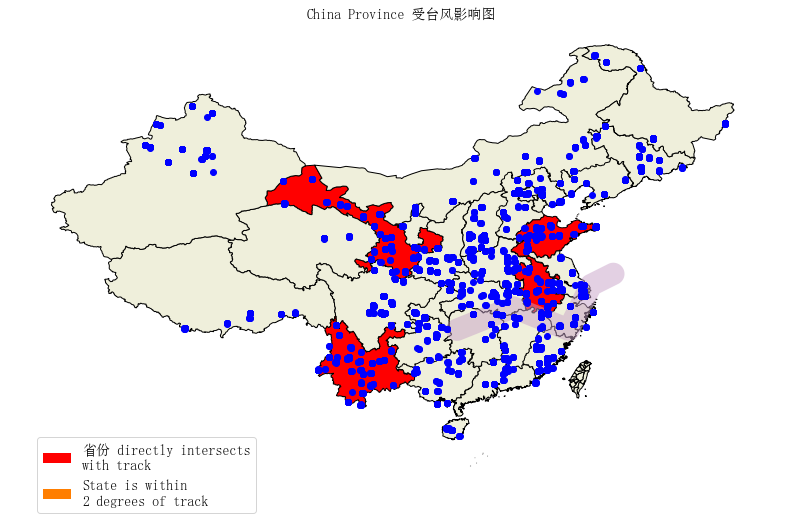

In [79]:

import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import shapely.geometry as sgeom
import geopandas

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 

# def sample_data():
# #    lons = [110, 115, 120, 122, 124 ]
#     lons = [124, 122, 120, 115, 110 ]
#     lats = [33, 32, 28, 30, 28 ]
#     return lons, lats




#ax = plt.axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax = plt.axes(projection=ccrs.PlateCarree())

#ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.set_extent([70,140,15,50], ccrs.Geodetic())


f = open('D:\\text.csv', encoding = 'gbk')
my_data = pd.read_csv(f)
# x1 = [90, 100, 110, 120]
# y1 = [31, 35, 40, 20]
x1 = my_data.iloc[:,0]
y1 = my_data.iloc[:,1]
e1 = np.random.normal(0, 0.01, len(x1))
e2 = np.random.normal(0, 0.01, len(x1))

resolution = '10m'
category = 'cultural'
name = 'admin_1_states_provinces'
#name = 'CHN_adm3'
#CHN_adm3.shp
shpfilename = shpreader.natural_earth(resolution, category, name)

lons, lats = sample_data()

# to get the effect of having just the states without a map "background"
# turn off the outline and background patches
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

plt.title(u'China Province 受台风影响图', fontproperties=font)

# turn the lons and lats into a shapely LineString
track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical
# distance)
track_buffer = track.buffer(1)




df = geopandas.read_file(shpfilename)
df1 = df.loc[df['admin'] == 'China']
df2 = df.loc[df['admin'] == 'Taiwan']

s = []
for i in range(len(df1)):
    s.append(df1.iloc[i,-1])
for i in range(len(df2)):
    s.append(df2.iloc[i,-1])
    
    
L = []
for i in range(len(x1)):
    lons, lats = x1[i], y1[i]
    a = sgeom.asPoint((lons, lats))
    L.append(a)
    
    
for state in s:
    count = 0  
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'
    for l in L:
        if state.intersects(l):
            count += my_data.iloc[i, 4]
            #facecolor = 'red'
#     if state.intersects(track):
#         facecolor = 'red'
#     elif state.intersects(track_buffer):
#         facecolor = '#FF7E00'
    if count > 400:
        facecolor = 'red'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)


ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                   facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none')

# ny_lon, ny_lat = 75, 43
# delhi_lon, delhi_lat = 110, 28.61



size = np.array(my_data.iloc[:,2]/np.max(my_data.iloc[:,2])) * 10
for i in range(len(x1)):
    #sgeom.asPoint((x1[i], y1[i]))
    plt.plot(x1[i] + e1[i], y1[i] + e2[i], color='blue', linewidth=size[i], marker='o')#,transform=ccrs.Geodetic())
# plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
#          color='blue', linewidth=2, marker='o',
#          transform=ccrs.Geodetic(),
#          )



# read the german borders
# poly1 = df.loc[df['admin'] == 'China']['geometry']#.values[0]
# poly2 = df.loc[df['admin'] == 'Taiwan']['geometry']#.values[0]####
# ax = plt.axes(projection=ccrs.PlateCarree())

# ax.add_geometries(poly1, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5')
# ax.add_geometries(poly2, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5')

# make two proxy artists to add to a legend
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = [u'省份 directly intersects\nwith track',
          'State is within \n2 degrees of track']
plt.legend([direct_hit, within_2_deg], labels,
           loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True, prop=font)
ax.figure.set_size_inches(14, 9)
plt.show()


In [54]:
# #[x1[0]]#, y1[0]
# track1 = sgeom.LineString(zip(([x1[0:2]], [y1[0:2]])))
L = []
for i in range(100):
    lons, lats = x1[i], y1[i]
    a = sgeom.asPoint((lons, lats))
    L.append(a)

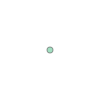

In [66]:
L[0]

In [68]:
#a = sgeom.asPoint((lons, lats))
#for state in s:
state.intersects(L[0])   

False

In [58]:
#track = sgeom.LineString(zip(lons, lats))
# l1 = sgeom.asPoint(zip(x1, y1))

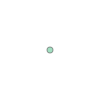

In [61]:
L[1]

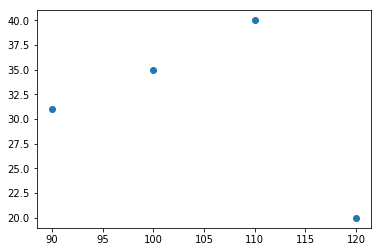

In [25]:
x1 = [90, 100, 110, 120]
y1 = [31, 35, 40, 20]
#plt.scatter(x1, y1, color='blue', linewidths=10, marker='o',transform=ccrs.Geodetic())
plt.scatter(x1, y1)
import numpy as np

In [ ]:
# coding=utf8
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 

def sample_data():
#    lons = [110, 115, 120, 122, 124 ]
    lons = [124, 122, 120, 115, 110 ]
    lats = [33, 32, 28, 30, 28 ]
    return lons, lats




#ax = plt.axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax = plt.axes(projection=ccrs.PlateCarree())

#ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.set_extent([75,125,15,50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces'
states_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)
#shapename = 'admin_1_states_provinces_lakes_shp'
#states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

lons, lats = sample_data()

# to get the effect of having just the states without a map "background"
# turn off the outline and background patches
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

plt.title(u'China Province 受台风影响图', fontproperties=font)

# turn the lons and lats into a shapely LineString
track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical
# distance)
track_buffer = track.buffer(1)




for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    # this will change if the storm intersects with our track
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'

    if state.intersects(track):
        facecolor = 'red'
    elif state.intersects(track_buffer):
        facecolor = '#FF7E00'

    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                   facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none')



# read the german borders
# poly1 = df.loc[df['admin'] == 'China']['geometry']#.values[0]
# poly2 = df.loc[df['admin'] == 'Taiwan']['geometry']#.values[0]####
# ax = plt.axes(projection=ccrs.PlateCarree())

# ax.add_geometries(poly1, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5')
# ax.add_geometries(poly2, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5')

# make two proxy artists to add to a legend
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = [u'省份 directly intersects\nwith track',
          'State is within \n2 degrees of track']
plt.legend([direct_hit, within_2_deg], labels,
           loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True, prop=font)
ax.figure.set_size_inches(14, 9)
plt.show()

# 绘制极地投影地图
绘制该地图需要使用最新版的cartopy-0.12版本，windows下暂无此版本，可以安装好0.11后，删除cartopy安装目录下的mpl文件夹下的全部文件，然后拷贝0.12目录cartopy-0.12.0rc1\lib\cartopy\mpl文件夹下的全部文件进行替换，即可使用新版的功能。此程序长了点，因为Cartopy对极坐标投影没有自动标注经纬度功能，需要自己设置，调了好久标注位置，请大家切用且珍惜哈。

In [ ]:
# import matplotlib.path as mpath
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.ticker as mticker
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# fig=plt.figure(figsize=(6, 6))
# ax=plt.axes(projection=ccrs.NorthPolarStereo())
# box=[-180, 180, 55, 90]
# xstep,ystep=30,15
#     # Limit the map to -60 degrees latitude and below.
# ax.set_extent(box, crs=ccrs.PlateCarree())
# scale='50m'
# land = cfeature.NaturalEarthFeature('physical', 'land', scale,edgecolor='face',
#                                                               facecolor=cfeature.COLORS['land'])
# ocean = cfeature.NaturalEarthFeature('physical', 'ocean', scale,edgecolor='face',
#                                                              facecolor=cfeature.COLORS['water'])
# ax.add_feature(land,facecolor='0.75')
# ax.add_feature(ocean,facecolor='blue')
# ax.coastlines(scale,linewidth=0.9) 
# #标注坐标轴
# line=ax.gridlines(draw_labels=False)

# line.ylocator=mticker.FixedLocator(np.arange(40,90,20))#手动设置x轴刻度
# line.xlocator=mticker.FixedLocator(np.arange(-180,210,30))#手动设置x轴刻度
#     # Compute a circle in axes coordinates, which we can use as a boundary
#     # for the map. We can pan/zoom as much as we like - the boundary will be
#     # permanently circular.
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)
# ax.set_boundary(circle, transform=ax.transAxes)

# #创建要标注的labels字符串
# ticks=np.arange(0,210,30)
# etick=['0']+['%d$^\circ$E'%tick for tick in ticks if (tick !=0) & (tick!=180)]+['180']
# wtick=['%d$^\circ$W'%tick for tick in ticks if (tick !=0) & (tick!=180)]
# labels=etick+wtick
# #创建与labels对应的经纬度标注位置
# #xticks=[i for i in np.arange(0,210,30)]+[i for i in np.arange(-32,-180,-30)]
# xticks=[-0.8,28,58,89.1,120,151,182.9,-36,-63,-89,-114,-140]
# yticks=[53]+[53]+[54]+[55]*2+[54.5]+[54]+[50]+[49]*3+[50.6]

# #标注经纬度    
# #ax.text(0.01,0.23,'60$^\circ$W',transform=ax.transAxes,rotation=25)
# #ax.text(-63,50,'60$^\circ$W',transform=ccrs.Geodetic(),rotation=25)
# for xtick,ytick,label in zip(xticks,yticks,labels):
#     ax.text(xtick,ytick,label,transform=ccrs.Geodetic())
# x=[180, 180, 0, 0]
# y=[50, 90, 90, 50]
# ax.plot([-180,0],[80,80],':',transform=ccrs.Geodetic(),color='k',linewidth=0.4)
# ax.plot([-90,90],[80,80],':',transform=ccrs.Geodetic(),color='k',linewidth=0.5)
# #ax.plot([90,0],[50,50],'-.',transform=ccrs.Geodetic(),color='r',linewidth=6)

# ax.text(11.9333,78.9166,r'$\bigstar,transform=ccrs.Geodetic(),size=15,color='r')
# fig.savefig(u'c:\\北极.png',dpi=300)

In [ ]:
# #JOJO, IAP, Beiing, Email:mtjsummer@163.com
# #2018-02-07

# #练习2目标：
# #  1.使用函数形式调用cartopy
# #  2.绘制2个子图
# #  3.调整colorbar
# #  4.叠加显著性检验
# #  5.添加标题

# #==============================================================================

# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from netCDF4 import Dataset 
# import numpy as np

# #==============================================================================

# #读入数据
# f = Dataset('...slp.nc')
# #print(f)

# slp1    = f.variables['slp1'][0,:,:]
# slp2 = f.variables['slp2'][0,:,:]
# lats         = f.variables['lat'][:]
# lons         = f.variables['lon'][:]

# #==============================================================================

# #创建图纸,以及两个子图
# fig = plt.figure(figsize=(8,6))
# ax  = fig.add_subplot(211, projection=ccrs.PlateCarree(central_longitude=180))
# #定义投影方式
# projection = ccrs.PlateCarree()

# #==============================================================================

# #函数形式，调用cartopy，绘制全球地图
# def make_map(ax):
#     projection = ccrs.PlateCarree()
#     ax.set_global()
#     ax.coastlines(linewidth=0.5)
#     '''标注坐标轴'''
#     ax.set_xticks(np.linspace(-180, 180, 5), crs=projection) 
#     ax.set_yticks(np.linspace(-90, 90,5), crs=projection)
#     '''zero_direction_label=True 有度的标识，False则去掉'''
#     lon_formatter = LongitudeFormatter(zero_direction_label=True) 
#     lat_formatter = LatitudeFormatter()
#     ax.xaxis.set_major_formatter(lon_formatter)
#     ax.yaxis.set_major_formatter(lat_formatter)
#     '''添加网格线'''
#     #gl = ax.gridlines()
#     #ax.grid()
#     return ax

# #==============================================================================

# #设置colorbar
# # Set the colormap and norm to correspond to the data for which the colorbar will be used
# # 指定colorbar为bwr
# cmap = mpl.cm.RdBu_r
# # 设定每个图的colormap和colorbar所表示范围是一样的，归一化
# norm = mpl.colors.Normalize(vmin=-2.0, vmax=2.0)
# # 设置levels
# levels = mpl.ticker.MaxNLocator(nbin=16).tick_values(-2.0, 2.0)

# #==============================================================================

# # 开始绘图

# # 在ax上画地图
# ax = make_map(ax)
# # 填充颜色
# p  = ax.contourf(lons, lats, slp1, levels=levels, cmap=cmap, transform=projection)
# # 画等值线
# pl = ax.contour(lons, lats, slp1, levels=levels, linewidths=0.5, colors='k', transform=projection)  
# # 设置title
# ax.set_title('Reg_SLP1')
# # 添加colorbar
# fig.colorbar(p,ax=ax, extend='both')

# # 在ax1上画图
# ax1  = fig.add_subplot(212, projection=ccrs.PlateCarree(central_longitude=180))
# # 在ax1上画地图
# ax1 = make_map(ax1)
# # 填充颜色
# p1  = ax1.contourf(lons, lats, slp2, levels=levels, cmap=cmap, transform=projection)
# # 画等值线
# pl1 = ax1.contour(lons, lats, slp2, levels=levels, linewidths=0.5, colors='k', transform=projection)  
# # 设置title
# ax1.set_title('Reg_SLP2')
# # 添加colorbar
# fig.colorbar(p1,ax=ax1, extend='both')

# #==============================================================================

# # 保存图片
# # adjust spacing between subplots so ax and ax1 title and ticks labels don't overlay
# fig.tight_layout()
# plt.savefig("./fig/06carotpy.multimap.png")

In [ ]:
__tags__ = ['Lines and polygons']

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def main():
    fig = plt.figure(figsize=[10, 5])
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                          sharex=ax1, sharey=ax1)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
"""
Arrows
------
Plotting arrows.
"""
__tags__ = ['Vector data']

import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def sample_data(shape=(20, 30)):
    """
    Return ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.
    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs


def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-10, 45))

    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

    ax.set_global()
    ax.gridlines()

    x, y, u, v, vector_crs = sample_data()
    ax.quiver(x, y, u, v, transform=vector_crs)

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
"""
Plotting the Aurora Forecast from NOAA on Orthographic Polar Projection
-----------------------------------------------------------------------
The National Oceanic and Atmospheric Administration (NOAA) monitors the
solar wind conditions using the ACE spacecraft orbiting close to the L1
Lagrangian point of the Sun-Earth system. This data is fed into the
OVATION-Prime model to forecast the probability of visible aurora at
various locations on Earth. Every five minutes a new forecast is
published for the coming 30 minutes. The data is provided as a
1024 by 512 grid of probabilities in percent of visible aurora. The
data spaced equally in degrees from -180 to 180 and -90 to 90.
"""
__tags__ = ["Scalar data"]
try:
    from urllib2 import urlopen
except ImportError:
    from urllib.request import urlopen

from io import StringIO

import numpy as np
from datetime import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


def aurora_forecast():
    """
    Get the latest Aurora Forecast from http://swpc.noaa.gov.
    Returns
    -------
    img : numpy array
        The pixels of the image in a numpy array.
    img_proj : cartopy CRS
        The rectangular coordinate system of the image.
    img_extent : tuple of floats
        The extent of the image ``(x0, y0, x1, y1)`` referenced in
        the ``img_proj`` coordinate system.
    origin : str
        The origin of the image to be passed through to matplotlib's imshow.
    dt : datetime
        Time of forecast validity.
    """

    # GitHub gist to download the example data from
    url = ('https://gist.githubusercontent.com/belteshassar/'
           'c7ea9e02a3e3934a9ddc/raw/aurora-nowcast-map.txt')
    # To plot the current forecast instead, uncomment the following line
    # url = 'http://services.swpc.noaa.gov/text/aurora-nowcast-map.txt'

    response_text = StringIO(urlopen(url).read().decode('utf-8'))
    img = np.loadtxt(response_text)
    # Read forecast date and time
    response_text.seek(0)
    for line in response_text:
        if line.startswith('Product Valid At:', 2):
            dt = datetime.strptime(line[-17:-1], '%Y-%m-%d %H:%M')

    img_proj = ccrs.PlateCarree()
    img_extent = (-180, 180, -90, 90)
    return img, img_proj, img_extent, 'lower', dt


def aurora_cmap():
    """Return a colormap with aurora like colors"""
    stops = {'red': [(0.00, 0.1725, 0.1725),
                     (0.50, 0.1725, 0.1725),
                     (1.00, 0.8353, 0.8353)],

             'green': [(0.00, 0.9294, 0.9294),
                       (0.50, 0.9294, 0.9294),
                       (1.00, 0.8235, 0.8235)],

             'blue': [(0.00, 0.3843, 0.3843),
                      (0.50, 0.3843, 0.3843),
                      (1.00, 0.6549, 0.6549)],

             'alpha': [(0.00, 0.0, 0.0),
                       (0.50, 1.0, 1.0),
                       (1.00, 1.0, 1.0)]}

    return LinearSegmentedColormap('aurora', stops)


def sun_pos(dt=None):
    """This function computes a rough estimate of the coordinates for
    the point on the surface of the Earth where the Sun is directly
    overhead at the time dt. Precision is down to a few degrees. This
    means that the equinoxes (when the sign of the latitude changes)
    will be off by a few days.
    The function is intended only for visualization. For more precise
    calculations consider for example the PyEphem package.
    Parameters
    ----------
    dt: datetime
        Defaults to datetime.utcnow()
    Returns
    -------
    lat, lng: tuple of floats
        Approximate coordinates of the point where the sun is
        in zenith at the time dt.
    """
    if dt is None:
        dt = datetime.utcnow()

    axial_tilt = 23.4
    ref_solstice = datetime(2016, 6, 21, 22, 22)
    days_per_year = 365.2425
    seconds_per_day = 24*60*60.0

    days_since_ref = (dt - ref_solstice).total_seconds()/seconds_per_day
    lat = axial_tilt*np.cos(2*np.pi*days_since_ref/days_per_year)
    sec_since_midnight = (dt - datetime(dt.year, dt.month, dt.day)).seconds
    lng = -(sec_since_midnight/seconds_per_day - 0.5)*360
    return lat, lng


def fill_dark_side(ax, time=None, *args, **kwargs):
    """
    Plot a fill on the dark side of the planet (without refraction).
    Parameters
    ----------
        ax : Matplotlib axes
            The axes to plot on.
        time : datetime
            The time to calculate terminator for. Defaults to datetime.utcnow()
        **kwargs :
            Passed on to Matplotlib's ax.fill()
    """
    lat, lng = sun_pos(time)
    pole_lng = lng
    if lat > 0:
        pole_lat = -90 + lat
        central_rot_lng = 180
    else:
        pole_lat = 90 + lat
        central_rot_lng = 0

    rotated_pole = ccrs.RotatedPole(pole_latitude=pole_lat,
                                    pole_longitude=pole_lng,
                                    central_rotated_longitude=central_rot_lng)

    x = np.empty(360)
    y = np.empty(360)
    x[:180] = -90
    y[:180] = np.arange(-90, 90.)
    x[180:] = 90
    y[180:] = np.arange(90, -90., -1)

    ax.fill(x, y, transform=rotated_pole, **kwargs)


def main():
    fig = plt.figure(figsize=[10, 5])

    # We choose to plot in an Orthographic projection as it looks natural
    # and the distortion is relatively small around the poles where
    # the aurora is most likely.

    # ax1 for Northern Hemisphere
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

    # ax2 for Southern Hemisphere
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

    img, crs, extent, origin, dt = aurora_forecast()

    for ax in [ax1, ax2]:
        ax.coastlines(zorder=3)
        ax.stock_img()
        ax.gridlines()
        fill_dark_side(ax, time=dt, color='black', alpha=0.75)
        ax.imshow(img, vmin=0, vmax=100, transform=crs,
                  extent=extent, origin=origin, zorder=2,
                  cmap=aurora_cmap())

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
"""
Using Cartopy and AxesGrid toolkit
----------------------------------
This example demonstrates how to use cartopy `GeoAxes` with
`AxesGrid` from the `mpl_toolkits.axes_grid1`.
The script constructs an `axes_class` kwarg with Plate Carree projection
and passes it to the `AxesGrid` instance. The `AxesGrid` built-in
labelling is switched off, and instead a standard procedure
of creating grid lines is used. Then some fake data is plotted.
"""
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np


def sample_data_3d(shape):
    """Return `lons`, `lats`, `times` and fake `data`"""
    ntimes, nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    times = np.linspace(-1, 1, ntimes)
    new_shape = data.shape + (ntimes, )
    data = np.rollaxis(data.repeat(ntimes).reshape(new_shape), -1)
    data *= times[:, np.newaxis, np.newaxis]

    return lons, lats, times, data


def main():
    projection = ccrs.PlateCarree()
    axes_class = (GeoAxes,
                  dict(map_projection=projection))

    lons, lats, times, data = sample_data_3d((6, 73, 145))

    fig = plt.figure()
    axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(3, 2),
                    axes_pad=0.6,
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_mode

    for i, ax in enumerate(axgr):
        ax.coastlines()
        ax.set_xticks(np.linspace(-180, 180, 5), crs=projection)
        ax.set_yticks(np.linspace(-90, 90, 5), crs=projection)
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

        p = ax.contourf(lons, lats, data[i, ...],
                        transform=projection,
                        cmap='RdBu')

    axgr.cbar_axes[0].colorbar(p)

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
"""
Barbs
-----
Plotting barbs.
"""
__tags__ = ['Vector data']

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data


def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-90, 80, 10, 85], crs=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()

    x, y, u, v, vector_crs = sample_data(shape=(10, 14))
    ax.barbs(x, y, u, v, length=5,
             sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
             linewidth=0.95, transform=vector_crs)

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
# """
# Displaying data on an eccentric ellipse
# ---------------------------------------
# This example demonstrates plotting data on an eccentric ellipse. The data
# plotted is a topography map of the asteroid Vesta. The map is actually an
# image, which is defined on an equirectangluar projection relative to an
# ellipse with a semi-major axis of 285 km and a semi-minor axis of 229 km.
# The image is reprojected on-the-fly onto a geostationary projection with
# matching eccentricity.
# """
# try:
#     from urllib2 import urlopen
# except ImportError:
#     from urllib.request import urlopen
# from io import BytesIO

# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt
# import numpy as np
# from PIL import Image


# def vesta_image():
#     """
#     Return an image of Vesta's topography.
#     Image credit: NASA/JPL-Caltech/UCLA/MPS/DLR/IDA/PSI
#     Returns
#     -------
#     img : numpy array
#         The pixels of the image in a numpy array.
#     img_proj : cartopy CRS
#         The rectangular coordinate system of the image.
#     img_extent : tuple of floats
#         The extent of the image ``(x0, y0, x1, y1)`` referenced in
#         the ``img_proj`` coordinate system.
#     """
#     url = 'https://www.nasa.gov/sites/default/files/pia17037.jpg'
#     img_handle = BytesIO(urlopen(url).read())
#     raw_image = Image.open(img_handle)
#     # The image is extremely high-resolution, which takes a long time to
#     # plot. Sub-sampling reduces the time taken to plot while not
#     # significantly altering the integrity of the result.
#     smaller_image = raw_image.resize([raw_image.size[0] // 10,
#                                       raw_image.size[1] // 10])
#     img = np.asarray(smaller_image)
#     # We define the semimajor and semiminor axes, but must also tell the
#     # globe not to use the WGS84 ellipse, which is its default behaviour.
#     img_globe = ccrs.Globe(semimajor_axis=285000., semiminor_axis=229000.,
#                            ellipse=None)
#     img_proj = ccrs.PlateCarree(globe=img_globe)
#     img_extent = (-895353.906273091, 895353.906273091,
#                   447676.9531365455, -447676.9531365455)
#     return img, img_globe, img_proj, img_extent


# def main():
#     img, globe, crs, extent = vesta_image()
#     projection = ccrs.Geostationary(globe=globe)

#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1, projection=projection)
#     ax.imshow(img, transform=crs, extent=extent)
#     fig.text(.075, .012, "Image credit: NASA/JPL-Caltech/UCLA/MPS/DLR/IDA/PSI",
#              bbox={'facecolor': 'w', 'edgecolor': 'k'})
#     plt.show()


# if __name__ == '__main__':
#     main()

In [ ]:
# """
# Reprojecting images from a Geostationary projection
# ---------------------------------------------------
# This example demonstrates Cartopy's ability to project images into the desired
# projection on-the-fly. The image itself is retrieved from a URL and is loaded
# directly into memory without storing it intermediately into a file. It
# represents pre-processed data from the Spinning Enhanced Visible and Infrared
# Imager onboard Meteosat Second Generation, which has been put into an image in
# the data's native Geostationary coordinate system - it is then projected by
# cartopy into a global Miller map.
# """
# __tags__ = ["Scalar data"]

# try:
#     from urllib2 import urlopen
# except ImportError:
#     from urllib.request import urlopen
# from io import BytesIO

# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt


# def geos_image():
#     """
#     Return a specific SEVIRI image by retrieving it from a github gist URL.
#     Returns
#     -------
#     img : numpy array
#         The pixels of the image in a numpy array.
#     img_proj : cartopy CRS
#         The rectangular coordinate system of the image.
#     img_extent : tuple of floats
#         The extent of the image ``(x0, y0, x1, y1)`` referenced in
#         the ``img_proj`` coordinate system.
#     origin : str
#         The origin of the image to be passed through to matplotlib's imshow.
#     """
#     url = ('https://gist.github.com/pelson/5871263/raw/'
#            'EIDA50_201211061300_clip2.png')
#     img_handle = BytesIO(urlopen(url).read())
#     img = plt.imread(img_handle)
#     img_proj = ccrs.Geostationary(satellite_height=35786000)
#     img_extent = [-5500000, 5500000, -5500000, 5500000]
#     return img, img_proj, img_extent, 'upper'


# def main():
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Miller())
#     ax.coastlines()
#     ax.set_global()
#     print('Retrieving image...')
#     img, crs, extent, origin = geos_image()
#     print('Projecting and plotting image (this may take a while)...')
#     ax.imshow(img, transform=crs, extent=extent, origin=origin, cmap='gray')
#     plt.show()


# if __name__ == '__main__':
#     main()

In [ ]:
from cartopy.io import shapereader
import numpy as np
import geopandas
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
plt.figure(figsize = [10, 10])
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

# read the german borders
poly1 = df.loc[df['ADMIN'] == 'China']['geometry']#.values[0]
poly2 = df.loc[df['ADMIN'] == 'Taiwan']['geometry']#.values[0]####
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_geometries(poly1, crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='0.5')
ax.add_geometries(poly2, crs=ccrs.PlateCarree(), facecolor='none', ####
                  edgecolor='0.5')

ax.set_extent([70, 140, 10, 60], crs=ccrs.PlateCarree())

In [ ]:
df.iloc[:100, :].to_csv('map2.csv')

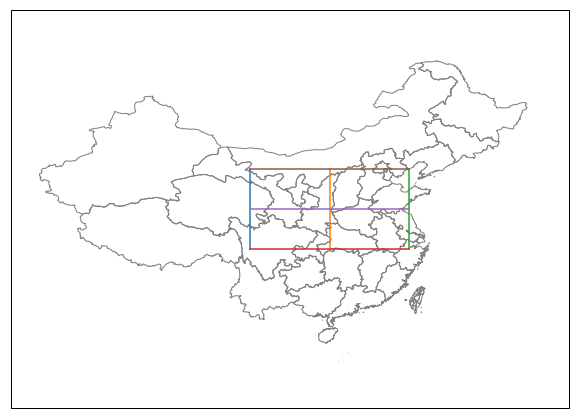

In [94]:
from cartopy.io import shapereader
import numpy as np
import geopandas
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
plt.figure(figsize = [10, 10])
resolution = '10m'
category = 'cultural'
name = 'admin_1_states_provinces'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

# read the german borders
poly1 = df.loc[df['admin'] == 'China']['geometry']#.values[0]
poly2 = df.loc[df['admin'] == 'Taiwan']['geometry']#.values[0]####
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_geometries(poly1, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5')
ax.add_geometries(poly2, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0.5')

# plt.plot([120, 120], [30, 40])
# plt.plot([110, 110], [30, 40])
# plt.plot([110, 120], [30, 30])
# plt.plot([110, 120], [40, 40])
long1 = [100, 110, 120]
lat1 = [30, 35, 40]
for i in range(3):
    plt.plot([long1[i], long1[i]], [lat1[0], lat1[-1]])
for i in range(3):
    plt.plot([long1[0], long1[-1]], [lat1[i], lat1[i]])

ax.set_extent([70, 140, 10, 60], crs=ccrs.PlateCarree())
plt.show()

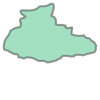

In [84]:
df.boxplot()

In [85]:
help(df.boxplot)

Help on method boxplot_frame in module pandas.plotting._core:

boxplot_frame(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds) method of geopandas.geodataframe.GeoDataFrame instance
    Make a box plot from DataFrame column optionally grouped by some columns or
    other inputs
    
    Parameters
    ----------
    data : the pandas object holding the data
    column : column name or list of names, or vector
        Can be any valid input to groupby
    by : string or sequence
        Column in the DataFrame to group by
    ax : Matplotlib axes object, optional
    fontsize : int or string
    rot : label rotation angle
    figsize : A tuple (width, height) in inches
    grid : Setting this to True will show the grid
    layout : tuple (optional)
        (rows, columns) for the layout of the plot
    return_type : {None, 'axes', 'dict', 'both'}, default None
        The kind of object to return. The default is ``axes``

In [ ]:
df[df.iloc[:,6] == 'Taiwan']

In [ ]:
resolution = '10m'
category = 'cultural'
name = 'admin_1_states_provinces'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

In [ ]:
df.iloc[:100, :].to_csv('map1.csv')

In [ ]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

# Downloaded from http://biogeo.ucdavis.edu/data/gadm2/shp/DEU_adm.zip
fname = '/downloads/DEU/DEU_adm1.shp'

adm1_shapes = list(shpreader.Reader(fname).geometries())

ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Deutschland')
ax.coastlines(resolution='10m')

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.5)

ax.set_extent([4, 16, 47, 56], ccrs.PlateCarree())

plt.show()